In [2]:
!pip install openeo-gfmap==0.4.4 --quiet
!pip install git+https://github.com/WorldCereal/prometheo.git --quiet
!pip install git+https://github.com/ScaleAGData/scaleag-vito.git --quiet
!pip install seaborn --quiet
!pip install tabulate --quiet

In [3]:
from pathlib import Path
from scaleagdata_vito.openeo.extraction_utils import (
    check_job_status,
    get_succeeded_job_details,
    load_point_extractions,
    get_band_statistics,
    visualize_timeseries,
)

### Inspect OpenEO extractions

Once the extractions have been completed, we can inspect the job tracking dataframe to find out how many jobs were successfully completed.


In [4]:
extraction_folder = Path("/home/giorgia/Private/data/geomaize/extractions_2022/")  # Replace with your output folder path
status_histogram = check_job_status(extraction_folder)
succeeded_jobs = get_succeeded_job_details(extraction_folder)

+----------+---------+
| status   |   count |
|----------+---------|
| finished |       1 |
+----------+---------+
+------------------------------------+-----------+-------------+-----------------+
| id                                 | s2_tile   |   n_samples |   duration_mins |
|------------------------------------+-----------+-------------+-----------------|
| j-2503101415394e0e99a5d3f0b4133aea | 30PYR     |          43 |         107.383 |
+------------------------------------+-----------+-------------+-----------------+


We can do a more in-depth check of the extracted data by:

- manually inspecting a subset of the extracted data (`load_point_extractions` function)

- printing statistics for each individual band that was extracted (`get_band_statistics` function)

- visualizing time series for a specified sample id (`visualize_timeseries` function)

NOTE: keep in mind when inspecting the results that nodata value = 0

In [5]:
gdf = load_point_extractions(
    extractions_dir=Path(extraction_folder),
    subset=False,
)
stats_df = get_band_statistics(gdf)

2025-07-17 15:33:38.368 | INFO     | scaleagdata_vito.openeo.extraction_utils:load_point_extractions:166 - Found 1 geoparquet files in /home/giorgia/Private/data/geomaize/extractions_2022


+---------------+------------+--------+--------+--------+-------+---------------+------------+
| band          |   %_nodata |    min |    max |   mean |   std | start_datae   | end_date   |
|---------------+------------+--------+--------+--------+-------+---------------+------------|
| S2-L2A-B02    |      68.6  |   0.03 |   0.15 |   0.06 |  0.02 | 2021-07-01    | 2021-10-31 |
| S2-L2A-B03    |      68.6  |   0.06 |   0.17 |   0.09 |  0.02 | 2021-07-01    | 2021-10-31 |
| S2-L2A-B04    |      68.6  |   0.05 |   0.16 |   0.09 |  0.02 | 2021-07-01    | 2021-10-31 |
| S2-L2A-B05    |      68.6  |   0.11 |   0.23 |   0.15 |  0.02 | 2021-07-01    | 2021-10-31 |
| S2-L2A-B06    |      68.6  |   0.17 |   0.4  |   0.28 |  0.04 | 2021-07-01    | 2021-10-31 |
| S2-L2A-B07    |      68.6  |   0.19 |   0.46 |   0.32 |  0.05 | 2021-07-01    | 2021-10-31 |
| S2-L2A-B08    |      68.6  |   0.17 |   0.46 |   0.31 |  0.06 | 2021-07-01    | 2021-10-31 |
| S2-L2A-B8A    |      68.6  |   0.19 |   0.49 |  

In [6]:
gdf.sample_id.unique()

array(['3089TIN', '3084TIN', '3062FUU', '1061zin', '7036FUU', '7072ZIN',
       '3030Tin', '3073lab', '5036tug', '5060tug', '5002lab', '5014lab',
       '3074lab', '5012lab', '3075lab', '3076lab', '3077tug', '3078kpa',
       '3077kpa', '2050kpa', '3088TIN', '3087TIN', '3086TIN', '3085TIN',
       '3083TIN', '3082TIN', '3081TIN', '3080TIN', '3072ZIN', '3071ZIN',
       '3070ZIN', '7071ZIN', '3069TIN', '3068TIN', '3067FUU', '3066FUU',
       '3065FUU', '3064FUU', '3063FUU', '5038PAG', '1055zin', '7073ZIN',
       '3061fuu'], dtype=object)

/home/giorgia/.conda/envs/veg/lib/python3.10/site-packages/scaleagdata_vito/openeo/extraction_utils.py:303: RuntimeWarning: invalid value encountered in divide
  ndvi = (b8 - b4) / (b8 + b4)


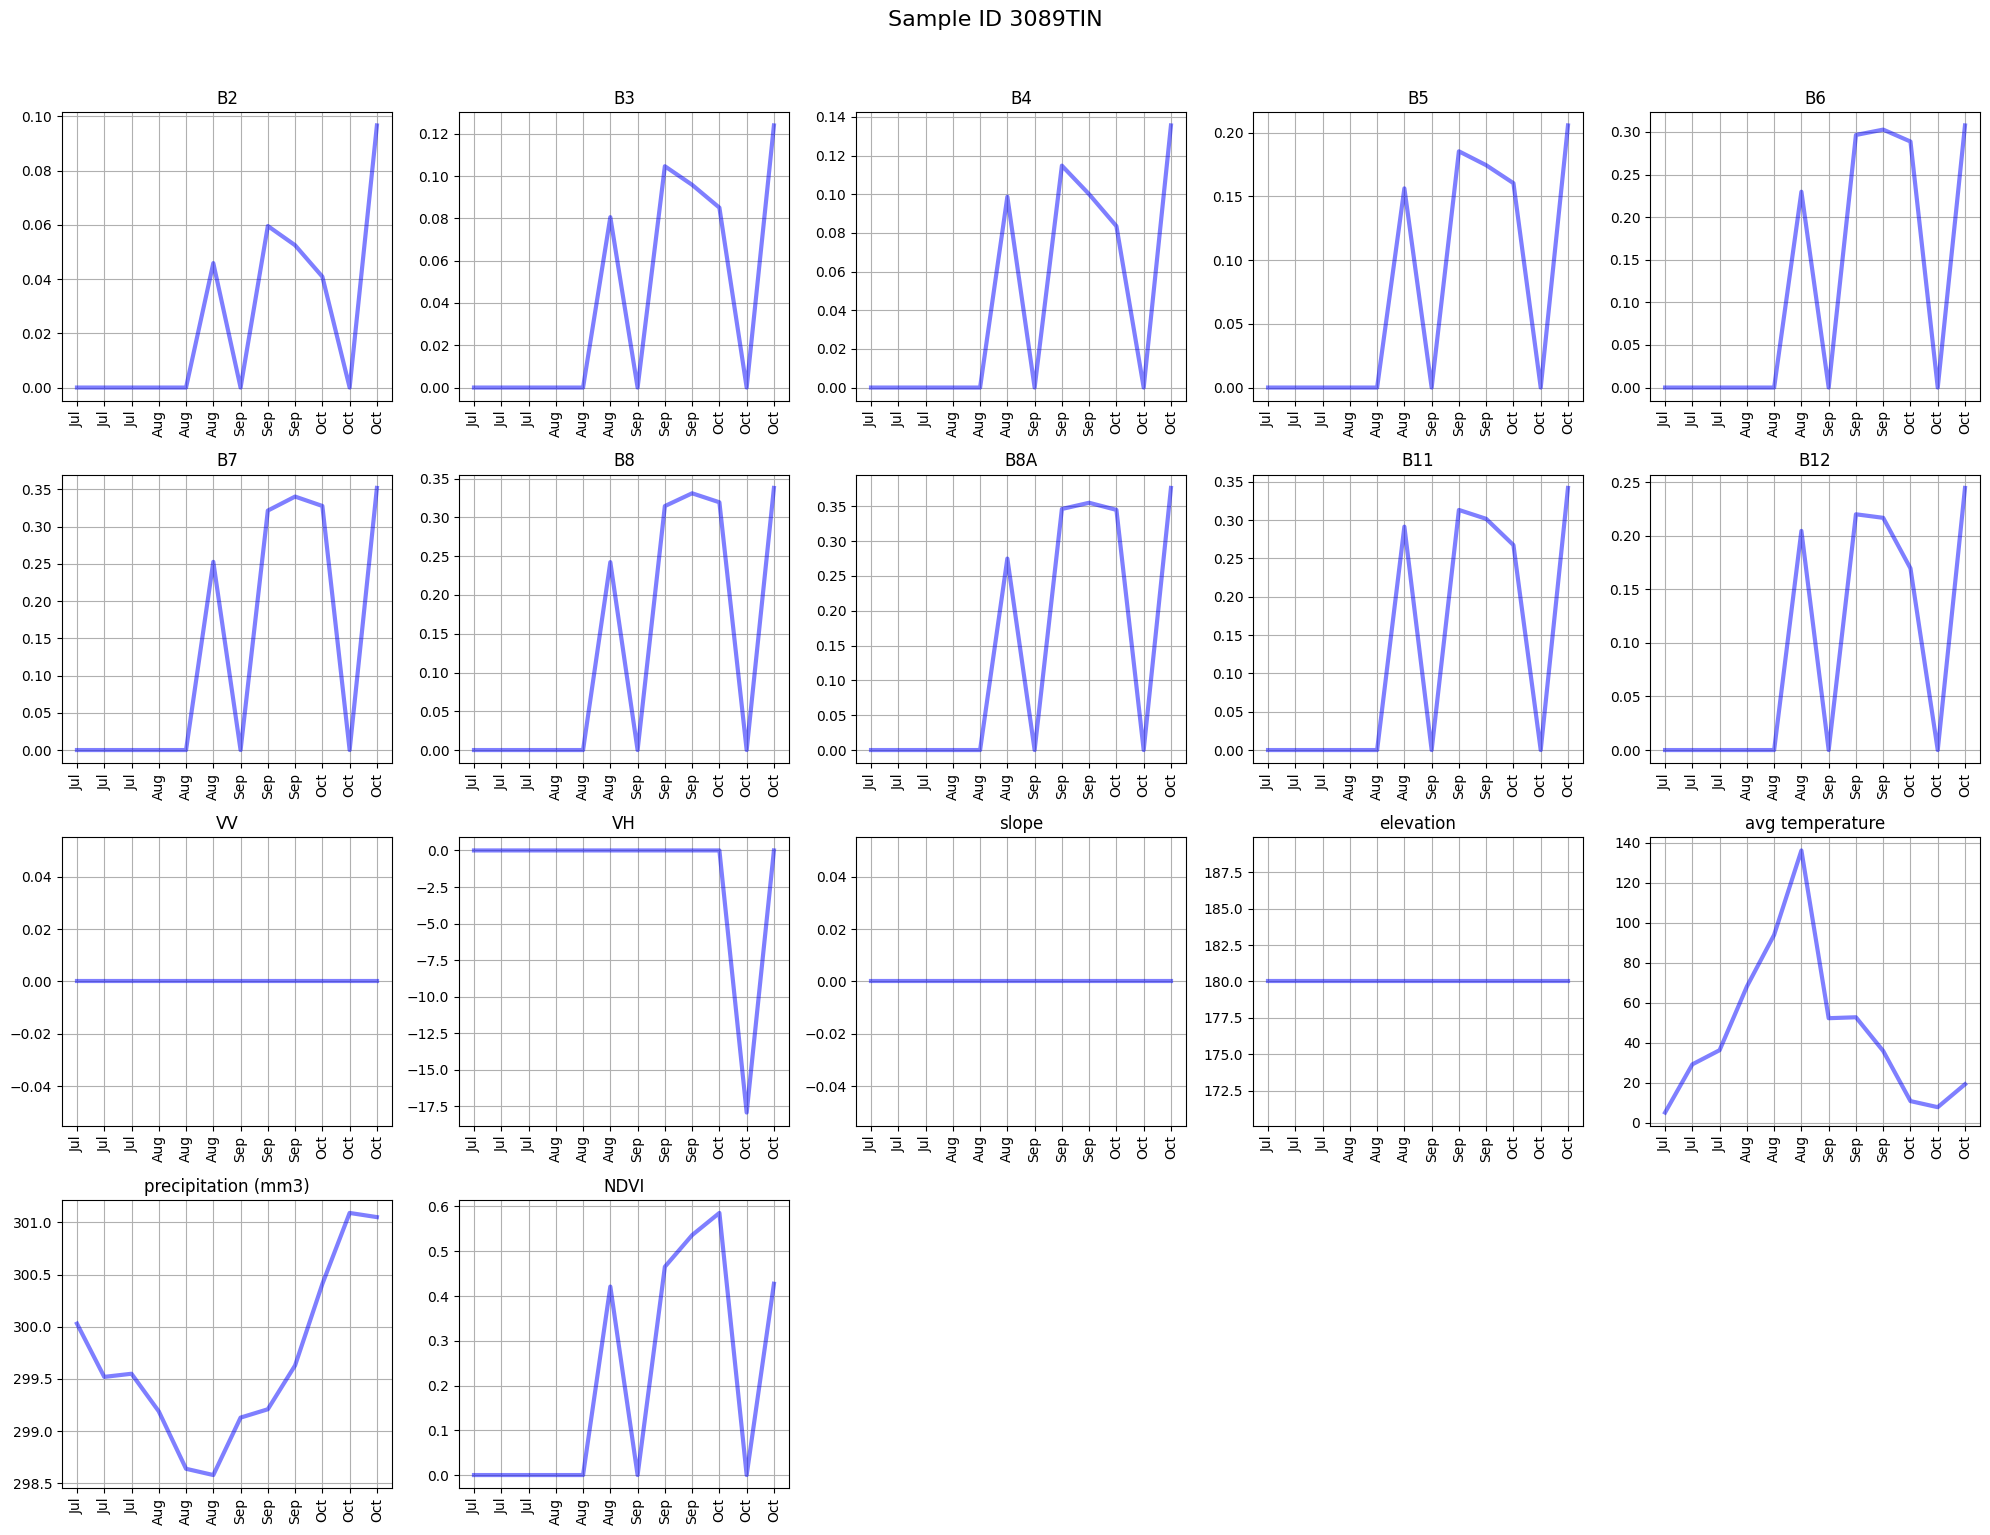

In [7]:
visualize_timeseries(gdf, sample_id="3089TIN")